# INSIGHT PROJECT -  House Rocket

This project aims to assist a real estate company to maximize it's proffits by indicating the best properties to buy as well the best time to sell them, through data analysis.

# Business Understanding

House Rocket company belongs to the real estate sector, working with buying and selling properties. It has been consolidated by making good decisions based on some questions such as the ones bellow. 

## Business question

#### The two main questions behind the project are:
1) What are the properties that house rocket should buy, and for what price?

2) Once purchased, when it's the best time to sell it and for what price?


#### This project also wants to validate some hypothesis through data analysis:

H1) Properties with a good view and waterfront view are 30% more expensive on average than properties with good view but withoud waterfront view;

H2) Properties with building year before 1955 are 50% cheaper on average;

H3) Properties without basement have a square footage of the land space 30% bigger than properties with it;

H4) The propertie's price growth YoY (year over year) it's 5%;

H5) Properties with 3 bathrooms have a MoM growth of 15%.


# Imports

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Collection

In [2]:
#Reading data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Understanding

In [3]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Main observations

In [4]:
# Column 'date' isn't on datetime format

# Features 'condition','grade','waterfront' and 'view' needs to be transformed on categorical variables for future analysis

# There are no 'null' values on our dataset

# Our dataframe has 21613 rows and 21 columns

# Data Preparation

#### Adjusting column 'date'

In [5]:
# Converting 'date' to datetime format
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

#### Converting numerical to categorical variables

In [6]:
#Understanding columns "condition", "grade" and 'waterfront'
print('Values from "condition" column: {}'.format(df['condition'].unique()))
print('Values from "grade" column: {}'.format(df['grade'].unique()))
print('Values from "waterfront" column: {}'.format(df['waterfront'].unique()))
print('Values from "view" column: {}'.format(df['view'].unique()))

Values from "condition" column: [3 5 4 1 2]
Values from "grade" column: [ 7  6  8 11  9  5 10 12  4  3 13  1]
Values from "waterfront" column: [0 1]
Values from "view" column: [0 3 4 2 1]


In [7]:
# Setting up 'condition' column

# 'condition' values goes from 1 to 5, so we'll be considering that:
    # 1 and 2 ---- bad condition
    # 3 ---------- regular condition
    # 4 and 5 ---- good condition

    
df['condition'] = df['condition'].apply (lambda x:
                                         'bad' if x < 3 else
                                         'regular' if x == 3 else
                                         'good')


In [8]:
# Setting up 'grade' column

# 'grade' values goes from 1 to 13, so we'll be considering that:
    # 1 to 3 ---- low design
    # 4 to 10---- average design
    # 11 to 13--- high condition

    
df['grade'] = df['grade'].apply (lambda x:
                                         'low design' if x <= 3 else
                                         'average design' if (x >= 4) & (x<=10) else
                                         'high design')

In [9]:
# Setting up 'waterfront' column

# 'waterfront' values 0 and 1, where:
    # 0 ---- without waterfront view
    # 1 ---- with waterfront view

df['waterfront'] = df['waterfront'].apply (lambda x:'no' if x == 0 else 'yes')

In [10]:
# Setting up 'view' column

# 'view' values goes from 0 to 4, so we'll be considering that:
    # 0 to 1 ---- bad
    # 2  ---- regular
    # 3 to 4 --- good

    
df['view'] = df['view'].apply (lambda x:
                                         'bad' if x <= 1 else
                                         'regular' if x == 2 else
                                         'good')

#### Checking duplicate values

In [11]:
# Display all duplicate values from df
display(df[df['id'].duplicated(keep= False)])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,no,bad,...,average design,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,no,bad,...,average design,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,no,good,...,high design,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,no,good,...,high design,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,no,bad,...,average design,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,no,bad,...,average design,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,no,bad,...,average design,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,no,bad,...,average design,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,no,bad,...,average design,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [12]:
# There are 353 rows with duplicate values in our dataset

# On a first observation, it's possible to verify that the same 'id' has different prices. 
# Let's check if we have duplicate 'id' with the same 'price'

display(df[df[['id', 'price']].duplicated(keep= False)])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,no,good,...,average design,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,no,good,...,average design,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,6308000010,2014-12-08,585000.0,3,2.50,2290,5089,2.0,no,bad,...,average design,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,2015-04-23,585000.0,3,2.50,2290,5089,2.0,no,bad,...,average design,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,8648900110,2014-05-05,555000.0,3,2.50,1940,3211,2.0,no,bad,...,average design,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,2014-08-26,555000.0,3,2.50,1940,3211,2.0,no,bad,...,average design,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [13]:
# There are 6 registers with same 'id' and 'price'.
# For duplicate 'id' with same price we'll keep the first row.
df = df.drop_duplicates(subset= ['id', 'price'], keep= 'first')

# For the rest of duplicate values, we'll keep the last register since it's price is more current
df = df.drop_duplicates(subset= ['id'], keep= 'last')

In [14]:
display(df[df['id'].duplicated(keep= False)])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [15]:
# As observed, no more duplicate values

# EDA - Exploratory Data Analysis

#### Checking outliers

In [16]:
# To begin our EDA we'll check some statistical details, such as mean, quartile and max values
# in order to identify possible outliers.

# removing scientif notation so our visualization becomes easier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# View basic statistical details
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000,21436.000
mean,4580765328.178,541649.963,3.372,2.117,2082.705,15135.638,1.496,1790.960,291.744,1971.098,84.730,98077.862,47.560,-122.214,1988.314,12785.961
std,2876589633.673,367314.929,0.929,0.770,919.146,41538.621,0.540,829.026,442.782,29.385,402.431,53.469,0.139,0.141,685.699,27375.467
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123700078.750,324866.000,3.000,1.750,1430.000,5040.000,1.000,1200.000,0.000,1952.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904921185.000,450000.000,3.000,2.250,1920.000,7614.000,1.500,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308675062.500,645000.000,4.000,2.500,2550.000,10696.250,2.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.124,2370.000,10087.250
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [17]:
 # On a first look, there are 2 features that calls our attention:
    # 'bedrooms' | 'sqft_lot' 

#### Bedrooms outliers

In [18]:
# let's create a dataframe from all properties with 'bedrooms' 50% higher than our third quartile

# Get and store the third quartile value + 50% for bedrooms
tq_bedrooms = (df['bedrooms'].quantile(0.75))*1.5

bedrooms_outliers = df.loc[df['bedrooms']>tq_bedrooms]
print(bedrooms_outliers.shape)
bedrooms_outliers.head()

(62, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,2014-06-20,1950000.000,7,3.500,4640,15235,2.000,no,bad,...,high design,2860,1780,1965,2003,98040,47.567,-122.231,3230,20697
1135,4024100951,2015-01-05,420000.000,7,3.000,2940,8624,1.000,no,bad,...,average design,1690,1250,1977,0,98155,47.755,-122.307,1850,8031
1241,7227802030,2014-06-23,350000.000,7,3.000,2800,9569,1.000,no,regular,...,average design,1400,1400,1963,0,98056,47.510,-122.183,2150,7333
1660,9126101740,2014-12-04,490000.000,8,5.000,2800,2580,2.000,no,bad,...,average design,1880,920,1997,0,98122,47.609,-122.303,1800,2580
3721,5451100490,2015-01-15,884900.000,7,4.750,5370,10800,1.500,no,bad,...,average design,5370,0,1967,0,98040,47.538,-122.223,2310,10910


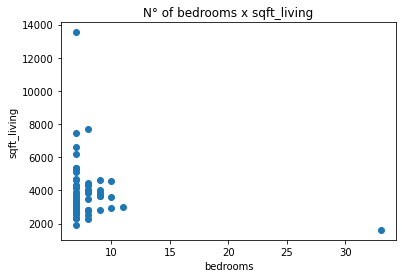

In [19]:
# Now with only 62 properties to analyze the outliers, let's associate the number of bedrooms with the square foot living
plt.scatter(bedrooms_outliers['bedrooms'], bedrooms_outliers['sqft_living'])
plt.title("N° of bedrooms x sqft_living")
plt.xlabel("bedrooms")
plt.ylabel("sqft_living")
plt.show()

In [20]:
# We'll assume that properties with more than 10 bedrooms are outliers.
# Their adjusted bedroom number will be based on the mean of other properties with simmilar square foot living.

# 11 bedrooms
sqft_11 = df['sqft_living'].loc[df['bedrooms']==11].reset_index(drop= True)[0]
proportion11 = sqft_11*0.3

correction11=df['bedrooms'].loc[(df['sqft_living'] > sqft_11-proportion11) & (df['sqft_living'] < sqft_11+proportion11)].mean()
print(correction11)

#so we'll change our bedroom number from 11 to 4
df['bedrooms'].loc[df['bedrooms']==11] = 4



# 33 bedrooms
sqft_33 = df['sqft_living'].loc[df['bedrooms']==33].reset_index(drop= True)[0]
proportion33 = sqft_33*0.3

correction33=df['bedrooms'].loc[(df['sqft_living'] > sqft_33-proportion33) & (df['sqft_living'] < sqft_33+proportion33)].mean()
print(correction33)

#so we'll change our bedroom number from 33 to 3
df['bedrooms'].loc[df['bedrooms']==33] = 3

3.8605437915048237
3.143379808167705


C:\Users\Mario\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


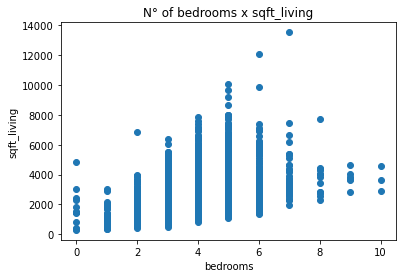

In [21]:
plt.scatter(df['bedrooms'], df['sqft_living'])
plt.title("N° of bedrooms x sqft_living")
plt.xlabel("bedrooms")
plt.ylabel("sqft_living")
plt.show()

#### sqft_lot outliers

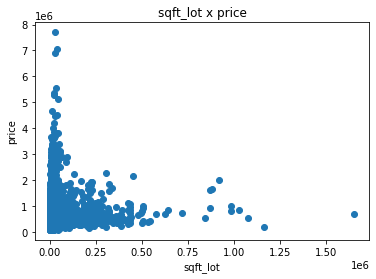

In [22]:
# Looking for outliers by comparing sqft_lot and price

plt.scatter(df['sqft_lot'], df['price'])
plt.title("sqft_lot x price")
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

In [23]:
# We can verify some possible outliers for sqft_lot bigger than 750.000
# A few points have a price near from 2 million, so we'll keep those on our analysis
# Let's check those few points sqft_lot size and consider outliers the ones above

sqft_outliers=df[df['sqft_lot']>750000]

sqft_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,2015-03-27,700000.000,4,1.000,1300,1651359,1.000,no,good,...,average design,1300,0,1920,0,98022,47.231,-122.023,2560,425581
3949,722069232,2014-09-05,998000.000,4,3.250,3770,982998,2.000,no,bad,...,average design,3770,0,1992,0,98058,47.414,-122.087,2290,37141
4441,3626079040,2014-07-30,790000.000,2,3.000,2560,982278,1.000,no,bad,...,average design,2560,0,2004,0,98014,47.696,-121.861,1620,40946
4540,2522029039,2014-09-29,550000.000,3,2.000,3650,843309,2.000,no,bad,...,average design,3650,0,1991,0,98070,47.363,-122.496,1870,273992
6691,2624089007,2015-03-20,1998000.000,2,2.500,3900,920423,2.000,no,bad,...,high design,3900,0,2009,0,98065,47.537,-121.756,2720,411962
7077,2724079090,2015-01-05,1650000.000,4,3.250,3920,881654,3.000,no,good,...,high design,3920,0,2002,0,98024,47.538,-121.896,2970,112384
7647,2623069031,2014-05-21,542500.000,5,3.250,3010,1074218,1.500,no,bad,...,average design,2010,1000,1931,0,98027,47.456,-122.004,2450,68825
7769,2323089009,2015-01-19,855000.000,4,3.500,4030,1024068,2.000,no,bad,...,average design,4030,0,2006,0,98045,47.462,-121.744,1830,11700
9714,225079036,2015-01-07,937500.000,4,4.000,5545,871200,2.000,no,bad,...,high design,3605,1940,2003,0,98014,47.676,-121.882,3420,871200
17319,3326079016,2015-05-04,190000.000,2,1.000,710,1164794,1.000,no,bad,...,average design,710,0,1915,0,98014,47.689,-121.909,1680,16730


mean price of sqft_outliers: 679250.0
corrected sqft_lot for sqft_outliers: 17132


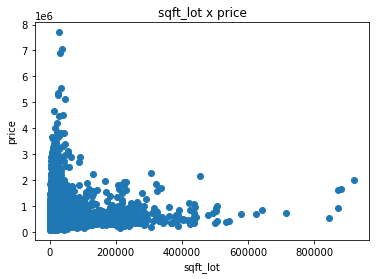

In [24]:
# Assuming that properties with sqft_lot bigger than 950.000 are outliers
sqft_outliers=df[df['sqft_lot']>950000]

# Let's verify their mean price and adjust the sqft_lot based on the rest of the dataset
sqft_out_mean = sqft_outliers['price'].mean()
print('mean price of sqft_outliers: {}'.format(sqft_out_mean))

# Calculate a proportion to filter dataset base
proportion = sqft_out_mean*0.1
correction_sqft=df[['price','sqft_lot']].loc[(df['price']>sqft_out_mean-proportion) & (df['price']<sqft_out_mean+proportion)]
correction_sqft=correction_sqft['sqft_lot'].mean()
print('corrected sqft_lot for sqft_outliers: {}'.format(int(correction_sqft)))

# Adjusting outliers
df.loc[df['sqft_lot']>950000,'sqft_lot']=correction_sqft


plt.scatter(df['sqft_lot'], df['price'])
plt.title("sqft_lot x price")
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

### Answering Business Questions

 #### What are the properties that house rocket should buy, and for what price?

In [25]:
# First, let's group our dataset by zipcode
df_zipcode = df[['zipcode','price']].groupby(['zipcode']).median().reset_index()
df_zipcode.rename(columns={'price':'median price'},inplace=True)
df_zipcode

,zipcode,median price
0,98001,260000.000
1,98002,235000.000
2,98003,269500.000
3,98004,1150000.000
4,98005,765475.000
...,...,...
65,98177,557000.000
66,98178,279500.000
67,98188,265000.000
68,98198,266750.000


In [26]:
# Merging the two datasets by column zipcode, adding a new column named median price on our original dataframe
df_buylist=pd.merge(df,df_zipcode,on='zipcode',how='inner')

In [27]:
# Creating a new column called 'Status', where we'll see if we should or shouldn't buy the property.
df_buylist['status']='NaN'

# First we'll sellect only properties with price less than median price and with regular/good condition
for row in range(len(df_buylist)):
    if (df_buylist.loc[row,'price']<df_buylist.loc[row,'median price'])&(df_buylist.loc[row,'condition']!='bad'):
        df_buylist.loc[row,'status']='buy'
    else:
        df_buylist.loc[row,'status']='not buy'

# Selecting only the properties to buy
df_buylist=df_buylist[df_buylist['status']=='buy']

# Now we'll include one more criteria: only houses with a regular/good view
# Let's remove properties with bad view
df_buylist.drop(df_buylist[df_buylist['view'] == 'bad'].index, inplace=True)
df_buylist


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,median price,status
64,9282801950,2014-08-18,279000.000,4,1.000,1210,6000.000,1.500,no,regular,...,0,1943,0,98178,47.503,-122.234,1470,6000,279500.000,buy
91,4136800205,2015-02-19,258000.000,2,2.000,750,6553.000,1.500,no,regular,...,0,1945,0,98178,47.498,-122.221,1140,7500,279500.000,buy
120,4058801230,2015-03-05,256000.000,4,1.750,1270,6825.000,1.000,no,regular,...,0,1950,0,98178,47.505,-122.242,1800,6930,279500.000,buy
271,1455100116,2015-02-02,397500.000,3,1.250,1510,13737.000,1.000,no,good,...,700,1961,0,98125,47.729,-122.283,2560,10202,425000.000,buy
658,8902000201,2015-02-19,338500.000,3,2.250,1333,1470.000,3.000,no,good,...,0,2009,0,98125,47.706,-122.302,1360,1680,425000.000,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21158,3294700030,2014-05-09,280950.000,3,1.750,1390,8700.000,1.000,no,good,...,550,1912,0,98055,47.472,-122.202,1390,10875,297225.000,buy
21254,7221400320,2014-10-03,213000.000,2,1.000,750,6089.000,1.000,no,regular,...,0,1937,0,98055,47.475,-122.199,1430,6451,297225.000,buy
21322,3294700101,2014-09-09,295000.000,2,1.750,1050,6500.000,1.500,no,regular,...,0,1925,0,98055,47.473,-122.200,1320,10075,297225.000,buy
21342,7221400285,2015-02-09,265000.000,2,1.000,820,8423.000,1.000,no,regular,...,0,1957,0,98055,47.474,-122.200,1960,9140,297225.000,buy


In [28]:
# Exporting table with recomended properties to buy
df_buylist = df_buylist.reset_index()
df_buylist = df_buylist[['id','date', 'zipcode', 'condition','grade', 'price', 'median price', 'status']]
#df_buylist.to_csv('properties_buy_list.csv')

#### Once purchased, when it's the best time to sell it and for what price?

In [29]:
# Usually the end of spring and beggining of summer is the best period to sell properties
# We'll consider than summer season is the best period to sell properties

# winter (01/dec to 28/feb)
# spring (01/mar to 31/may)
# summer (01/jun to 31/aug)
# Autumn (01/sep to 30/nov)

# Setting up a new column 'season' based on our purchase day (date)
df_sell_list = df_buylist.copy()
df_sell_list['season'] = pd.DatetimeIndex(df_sell_list['date']).month
df_sell_list['season'] = df_sell_list['season'].apply (lambda x:
                                                       'winter' if (x >= 12) & (x < 3) else
                                                       'spring' if (x >= 3) & (x < 6) else
                                                       'summer' if (x >= 6) & (x < 9) else
                                                       'autumn')
df_sell_list


,id,date,zipcode,condition,grade,price,median price,status,season
0,9282801950,2014-08-18,98178,regular,average design,279000.000,279500.000,buy,summer
1,4136800205,2015-02-19,98178,regular,average design,258000.000,279500.000,buy,autumn
2,4058801230,2015-03-05,98178,regular,average design,256000.000,279500.000,buy,spring
3,1455100116,2015-02-02,98125,good,average design,397500.000,425000.000,buy,autumn
4,8902000201,2015-02-19,98125,regular,average design,338500.000,425000.000,buy,autumn
...,...,...,...,...,...,...,...,...,...
198,3294700030,2014-05-09,98055,good,average design,280950.000,297225.000,buy,spring
199,7221400320,2014-10-03,98055,regular,average design,213000.000,297225.000,buy,autumn
200,3294700101,2014-09-09,98055,good,average design,295000.000,297225.000,buy,autumn
201,7221400285,2015-02-09,98055,regular,average design,265000.000,297225.000,buy,autumn


In [30]:
# Considering summer as the best season, properties that were bought on summer season we'll be sell with +10% of its price
# and propeties bought on other season with +30% of its price

for i in range(len(df_sell_list)):
    if df_sell_list.loc[i,'season']=='summer':
        df_sell_list.loc[i,'sell price']=df_sell_list.loc[i,'price']*1.1
    else:
        df_sell_list.loc[i,'sell price']=df_sell_list.loc[i,'price']*1.3

df_sell_list

,id,date,zipcode,condition,grade,price,median price,status,season,sell price
0,9282801950,2014-08-18,98178,regular,average design,279000.000,279500.000,buy,summer,306900.000
1,4136800205,2015-02-19,98178,regular,average design,258000.000,279500.000,buy,autumn,335400.000
2,4058801230,2015-03-05,98178,regular,average design,256000.000,279500.000,buy,spring,332800.000
3,1455100116,2015-02-02,98125,good,average design,397500.000,425000.000,buy,autumn,516750.000
4,8902000201,2015-02-19,98125,regular,average design,338500.000,425000.000,buy,autumn,440050.000
...,...,...,...,...,...,...,...,...,...,...
198,3294700030,2014-05-09,98055,good,average design,280950.000,297225.000,buy,spring,365235.000
199,7221400320,2014-10-03,98055,regular,average design,213000.000,297225.000,buy,autumn,276900.000
200,3294700101,2014-09-09,98055,good,average design,295000.000,297225.000,buy,autumn,383500.000
201,7221400285,2015-02-09,98055,regular,average design,265000.000,297225.000,buy,autumn,344500.000


In [31]:
# Creating a profit column and priorizing properties to sell
df_sell_list['profit'] = df_sell_list['sell price']-df_sell_list['price']
df_sell_list = df_sell_list.sort_values('profit',ascending=False).reset_index(drop=True)
df_sell_list

,id,date,zipcode,condition,grade,price,median price,status,season,sell price,profit
0,6447300345,2015-04-06,98039,regular,average design,1160000.000,1905000.000,buy,spring,1508000.000,348000.000
1,3024059044,2014-09-09,98040,good,average design,990000.000,993750.000,buy,autumn,1287000.000,297000.000
2,3622910190,2014-05-21,98040,good,average design,895000.000,993750.000,buy,spring,1163500.000,268500.000
3,2581300055,2014-11-21,98040,good,average design,885000.000,993750.000,buy,autumn,1150500.000,265500.000
4,9808590210,2014-05-13,98004,regular,average design,860000.000,1150000.000,buy,spring,1118000.000,258000.000
...,...,...,...,...,...,...,...,...,...,...,...
198,2214800110,2014-08-20,98001,regular,average design,259900.000,260000.000,buy,summer,285890.000,25990.000
199,3521059042,2014-07-28,98092,good,average design,255500.000,309780.000,buy,summer,281050.000,25550.000
200,6052401215,2014-06-09,98198,good,average design,255000.000,266750.000,buy,summer,280500.000,25500.000
201,425400070,2014-07-17,98056,good,average design,238000.000,380000.000,buy,summer,261800.000,23800.000


In [32]:
# Exporting table with properties to sell sorted by profit 
#df_sell_list.to_csv('properties_sell_list.csv')

### Hypothesis  validation

#### Properties with a good view and waterfront view are 30% more expensive on average than properties with good view but withoud waterfront view

In [81]:
# Filtering our dataset
without_waterfront = round(df['price'].loc[(df['waterfront'] == 'no') & (df['view'] != 'bad')].mean(), 2)
with_waterfront = round(df['price'].loc[(df['waterfront'] == 'yes') & (df['view'] != 'bad')].mean(), 2)

print('Mean price of properties with good view but without waterfront view: US$ {}'.format(without_waterfront))
print('Mean price of properties with good view and waterfront view: US$ {}'.format(with_waterfront))

# Calculating proportion between than
proportion = round((with_waterfront - without_waterfront )*100 / without_waterfront, 2)

print('Properties with good view and waterfront view are US$ {}% more expensive on average'.format(proportion))

Mean price of properties with good view but without waterfront view: US$ 892368.66
Mean price of properties with good view and waterfront view: US$ 1668214.77
Properties with good view and waterfront view are US$ 86.94% more expensive on average


#### Properties with building year before 1955 are 50% cheaper on average

In [80]:
# Separating dataset 
df_h2_less = df.loc[df['yr_built']<1955]
df_h2_more = df.loc[df['yr_built']>=1955]

# Creating variables
before_1955 = df_h2_less['price'].mean()
after_1955 = df_h2_more['price'].mean()

print('Mean price of properties built before 1955: US$ {}'.format(round(before_1955,2)))
print('Mean price of properties built after 1955: US$ {}'.format(round(after_1955,2)))

# Calculating proportion between than
proportion2 = round((before_1955 - after_1955) * 100 / after_1955,2)
print('Properties built before 1955 are US$ {}% cheaper on average'.format(proportion2))

Mean price of properties built before 1955: US$ 540100.38
Mean price of properties built after 1955: US$ 542265.19
Properties built before 1955 are US$ -0.4% cheaper on average


#### Properties without basement have a square footage of the land space 40% bigger than properties with it

In [79]:
# Creating variables
sqft_no_basement=round(df['sqft_lot'].loc[df['sqft_basement']==0].mean(),2)
sqft_yes_basement=round(df['sqft_lot'].loc[df['sqft_basement']!=0].mean(),2)

print('Average square footage of lands without basement: {}'.format(sqft_no_basement))
print('Average square footage of lands with basement: {}'.format(sqft_yes_basement))

# Calculating proportion between than
proportion3 = round(((sqft_no_basement - sqft_yes_basement) * 100 / sqft_yes_basement),2)
print('Properties without basement have an average square footage of the land {}% bigger than with basement'.format(proportion3))

Average square footage of lands without basement: 15886.45
Average square footage of lands with basement: 13170.46
Properties without basement have an average square footage of the land 20.62% bigger than with basement


#### The propertie's price growth YoY (year over year) it's 10%

In [78]:
# Creating column year
df['year'] = pd.DatetimeIndex(df['date']).year

# Analysing years separated
price_2014 = round(df['price'].loc[df['year']==2014].mean(),2)
price_2015 = round(df['price'].loc[df['year']==2015].mean(),2)

print('Average price on 2014: {}'.format(price_2014))
print('Average price on 2015: {}'.format(price_2015))

proportion4 = round(((price_2015 - price_2014) * 100 / price_2014),2)
print("The propertie's price growth YoY it's: {}%".format(proportion4))

Average price on 2014: 541337.59
Average price on 2015: 542298.14
The propertie's price growth YoY it's: 0.18%


#### Properties with 3 bathrooms have a MoM growth of 15%

In [99]:
# Filtering dataset by bathrooms = 3
df['month'] = pd.DatetimeIndex(df['date']).month
df_h5 = df[['price','month','year']].loc[df['bathrooms']==3].reset_index(drop=True)

# First month is 05/2014 and last month is 05/2015
# Number of months: 12
# Obtaining total price for first month and last month
first_month = df_h5['price'].loc[(df_h5['year']==2014) & (df_h5['month']==5)].sum()
last_month = df_h5['price'].loc[(df_h5['year']==2015) & (df_h5['month']==5)].sum()

# Calculating CMGR:
cmgr = round((((last_month/first_month) ** (1/12))-1)*100,2)
cmgr

print('There was a monthly decrease of: {}%'.format(cmgr))

There was a monthly decrease of: -9.87%


In [102]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 10], dtype=int64)

#### Properties with 2 or more floors are 40% more expensive on average than the others 

In [107]:
# Separating by floors bigger than 2
multiple_floors = round(df['price'].loc[df['floors']>=2].mean(),2)
single_floor = round(df['price'].loc[df['floors']<2].mean(),2)


proportion6 = round((multiple_floors - single_floor) * 100 / single_floor,2)
print('On average, properties with 2 or more floors are {}% more expensive'.format(proportion6))

On average, properties with 2 or more floors are 41.25% more expensive


#### Properties with more than 3 bedrooms 